# 12-1 datetime 오브젝트

### datetime 라이브러리를 구성하는 오브젝트
#### date = 날짜를 처리
#### time = 시간을 처리
#### datetime = 날짜와 시간을 처리

In [1]:
from datetime import datetime

In [2]:
now1 = datetime.now()
print(now1)

print('='*50)

now2 = datetime.today()
print(now2)

2020-09-16 02:31:33.452408
2020-09-16 02:31:33.452727


In [3]:
t1 = datetime.now()  # now 메소드는 밀리초 단위까지 구한다.
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print('='*50)
print(t2)
print('='*50)
print(t3)

2020-09-16 02:31:33.458343
1970-01-01 00:00:00
1970-12-12 13:24:34


In [4]:
# datetime 오브젝트를 사용하는 이유는 시간 계산이 가능하다는 점
diff1 = t1 - t2
print(diff1)
print(type(diff1))

18521 days, 2:31:33.458343
<class 'datetime.timedelta'>


In [5]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-18522 days, 21:28:26.541657
<class 'datetime.timedelta'>


In [6]:
# datetime 오브젝트로 변환하기 - to_datetime 메소드
import pandas as pd
import os

ebola = pd.read_csv('./data/country_timeseries.csv')

In [7]:
print(ebola.info())  # Date 컬럼이 문자열로 저장되어있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [8]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])  # datetime64[ns] 타입으로 새로 date_dt가 생성된다.
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [9]:
# 시간 형식 지정자(%d, %m, %y)와 기호(/, -)를 조합하여 format 매개변수에 전달하면 맞춤형 오브젝트를 얻을 수 있다.
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [10]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})

test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


## 시간 형식 지정자
### 시간 형식 지정자 >> 의미 >> 결과
#### a >> 요일 출력 >> Sun, Mon, ... Sat
#### A >> 요일 출력(긴 이름) >> Sunday, Monday, ... Saturday
#### w >> 요일 출력(숫자, 0부터 일요일) >> 0, 1, ..., 6
#### d >> 날짜 출력(2자리로 표시) >> 01, 02, ..., 31
#### b >> 월 출력 >> Jan, Feb, ..., Dec
#### B >> 월 출력(긴 이름) >> January, February, ..., December
#### m >> 월 출력(숫자) >> 01, 02, ..., 12
#### y >> 년 출력(2자리로 표시) >> 00, 01, ..., 99
#### Y >> 년 출력(4자리로 표시) >> 0001, 0002, ..., 2013, 2014, ..., 9999
#### H >> 시간 출력(24시간) >> 00, 01, ..., 23
#### I >> 시간 출력(12시간) >> 01, 02, ..., 12
#### p >> AM 또는 PM 출력 >> AM, PM
#### M >> 분 출력(2자리로 표시) >> 00, 01, ..., 59
#### S >> 초 출력(2자리로 표시) >> 00, 01, ..., 59
#### f >> 마이크로초 출력 >> 000000, 000001, ..., 999999
#### z >> UTC 차이 출력(+HHMM이나 -HHMM 형태) >> (None), +0000, -0400, +1030
#### Z >> 기준 지역 이름 출력 >> (None), UTC, EST, CST
#### j >> 올해의 지난 일 수 출력(1일, 2일, ...) >> 001, 002, ..., 336
#### U >> 올해의 지난 주 수 출력(1주, 2주, ...) >> 00, 01, ..., 53
#### c >> 날짜와 시간 출력 >> Tue Aug 16 21:30:00 1988
#### x >> 날짜 출력 >> 08/16/88 (None);08/16/1988
#### X >> 시간 출력 >> 21:30:00
#### G >> 년 출력(ISO8601 형식) >> 0001, 0002, ..., 2013, 2014, ..., 9999
#### u >> 요일 출력(ISO8601 형식) >> 1, 2, ..., 7
#### V >> 올해의 지난 주 수 출력(ISO8601 형식) >> 01, 02, ..., 53

In [11]:
# 시계열 데이터 구분해서 추출하기
# now 메소드로 얻은 시계열 데이터를 strftime 메소드와 시간 형식 지정자를 이용하여 잘라내야 함
now = datetime.now()
print(now)

2020-09-16 02:31:34.075619


In [12]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2020-09-16


In [13]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

02:31:34


In [14]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2020-09-16 02:31:34


In [15]:
# datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합을 불러오는 것이 더 간단하다.
# parse_dates 매개변수에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달해서 데이터 집합을 불러온 것
ebola1 = pd.read_csv('./data/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [16]:
# datetime 오브젝트에서 날짜 정보를 하나씩 추출
# 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [17]:
# datetime 오브젝트(d1)의 year, month, day 속성을 이용하면 년, 월, 일 정보를 바로 추출할 수 있다.
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


In [18]:
# 문자열 처리시 >> str 접근자를 사용해서 문자열 속성이나 메소드를 사용해야 했다.
# 시계열 처리시 >> dt 접근자를 사용해서 datetime 속성이나 메소드를 사용 가능하다.
# ebola 불러와서 Date 열을 datetime 오브젝트로 변환하여 date_dt열로 추가
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [19]:
# dt 접근자 없이 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출
print(ebola[['Date', 'date_dt']].head())
print('='*50)
print(ebola['date_dt'][3].year)
print('='*50)
print(ebola['date_dt'][3].month)
print('='*50)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


In [20]:
# dt 접근자를 이용 date_dt 열에 한번에 접근한 다음, year 속성을 이용해서 연도값을 추출한 것
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [21]:
# 위 과정을 응용하여 월, 일 데이터를 한번에 추출해서 새로운 열로 추가
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [22]:
print(ebola.info())  # 마지막 date_dt는 datetime 오브젝트이고, year, month, day는 정수형인 걸 알 수있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 12-2 사례별 시계열 데이터 계산하기

In [23]:
# 에볼라 최초 발병일 계산하기
# ebola 데이터프레임은 데이터가 시간 역순으로 정렬되어있다.
# 시간 순으로 보려면 데이터프레임의 마지막부터 살펴봐야 함.
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [24]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [25]:
# 에볼라의 진행정도
# Date 열에서 최초 발병일을 빼면 된다.
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


In [26]:
# 파산한 은행의 개수 구하기
banks = pd.read_csv('./data/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [27]:
# Closing Date와 Updated Date의 자료형은 문자열이다.
# read_csv 메소드의 parse_dates 속성을 이용해서 datetime 오브젝트로 두개 다 변환해서 불러온다.
banks_no_dates = pd.read_csv('./data/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [28]:
banks = pd.read_csv('./data/banklist.csv', parse_dates=[5, 6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [29]:
# dt 접근자와 quarter 속성을 이용해 은행이 파산한 분기를 파악 가능
banks['closing_quarter'], banks['closing_year'] = \
(banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [30]:
# 연도별 파산한 은행의 개수
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [31]:
# 연도별, 분기별로 파산한 은행의 개수
# banks 데이터프레임에 연도별로 그룹화 하고, 다시 분기별로 그룹화하여 출력
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

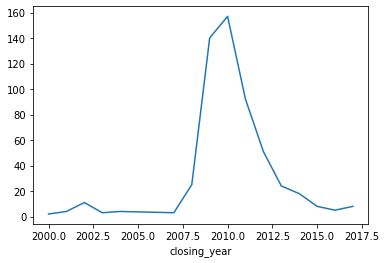

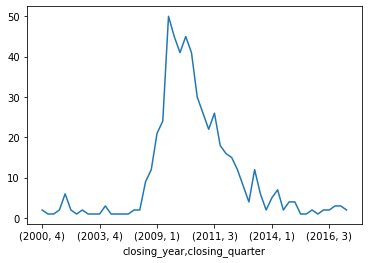

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

In [33]:
# 테슬라 주식 데이터로 시간 계산하기
# pip install pandas-datareader

In [34]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr
# tesla에는 데이터프레임이 저장된다.
# tesla = pdr.get_data_quandl('TSLA', api_key = '받은 api Key')
# tesla에 저장된 데이터프레임을 파일로 저장.
# tesla.to_csv('./data/tesla_stock_quandl.csv')

tesla = pd.read_csv('./data/tesla_stock_quandl.csv')
print(tesla.head())

         Date    Open    High     Low   Close      Volume  ExDividend  \
0  2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1  2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2  2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3  2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4  2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
0         1.0   304.00   304.27  277.18    279.18  13696168.0  
1         1.0   307.34   307.59  291.36    304.18   8324639.0  
2         1.0   311.25   311.61  300.45    301.54   6600538.0  
3         1.0   313.89   318.82  308.18    309.10   4914307.0  
4         1.0   310.25   322.44  310.19    316.53   5927881.0  


In [35]:
# Date 열이 문자열이므로 불러올 때 datetime 형으로 parse_dates 매개변수에 Date 열을 주면 된다.
tesla = pd.read_csv('./data/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [36]:
#  dt 접근자를 사용하여 2010년 6월 데이터만 불린추출 합니다.
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


In [37]:
# datetime 오브젝트를 데이터프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있다.
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


In [38]:
print(tesla['2015'].iloc[:5, :5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


In [39]:
print(tesla['2010-06'].iloc[:, :5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


In [40]:
# 최초 5일간만 수집된 데이터를 보고 싶을 때 시간 간격을 인덱스로 지정해서 데이터를 추출하면 된다.
# ref_date는 Date 열에서 Date 열의 최소값을 뺀 값 >> 흐른 시간

tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

In [41]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5, :5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


In [42]:
print(tesla['5 days':].iloc[:5, :5])  # 4 days는 데이터가 없어서 출력되지 않았다.

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


In [43]:
# 시간 범위와 인덱스
# 특정일이 누락된 데이터도 포함해야 하는 경우
# 에볼라 데이터는 2015년 1월 1일 데이터가 없다!

ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [44]:
# 뒤쪽도 마찬가지다! 2014년 3월 23일 데이터가 없다!
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [45]:
# date_range 메소드를 사용하여 2014년 12월 31일부터 2015년 1월 5일 사이의 시간 인덱스를 생성한 것
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [46]:
# 반드시 Date 열을 인덱스로 지정한 다음, 위에서 생성한 시간 범위를 인덱스로 지정해야 한다.
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


## 시간 범위의 주기 설정하기
### 시간 범위를 인덱스로 지정하면 DatetimeIndex 자료형이 만들어진다.
### freq 속성이 포함되어 있는데 속성값을 지정하면 시간 간격을 조절하여 DatetimeIndex를 만들 수 있다.
<br></br>
### freq 속성값으로 사용할 수 있는 시간 주기
### 시간주기 >> 설명
#### B >> 평일만 포함
#### C >> 사용자가 정의한 평일만 포함
#### D >> 달력 일자 단위
#### W >> 주간 단위
#### M >> 월 마지막 날만 포함
#### SM >> 15일과 월 마지막 날만 포함
#### BM >> M 주기의 값이 휴일이면 제외하고 평일만 포함
#### CBM >> BM에 사용자 정의 평일을 적용
#### MS >> 월 시작일만 포함
#### SMS >> 월 시작일과 15일만 포함
#### BMS >> MS 주기의 값이 휴일이면 제외하고 평일만 퐇람
#### CBMS >> BMS에 사용자 정의 평일을 적용
#### Q >> 3, 6, 9, 12월 분기 마지막 날만 포함
#### BQ >> 3, 6, 9, 12월 분기 마지막 날이 휴일이면 제외하고 평일만 포함
#### QS >> 3, 6, 9, 12월 분기 시작일만 포함
#### BQS >> 3, 6, 9, 12월 분기 시작일이 휴일이면 제외하고 평일만 포함
#### A >> 년의 마지막 날만 포함
#### BA >> 년의 마지막 날이 휴일이면 제외하고 평일만 포함
#### AS >> 년의 시작일만 포함
#### BAS >> 년의 시작일이 휴일이면 제외하고 평일만 포함
#### BH >> 평일의 시간 단위로 포함(09:00 ~ 16:00)
#### H >> 시간 단위로 포함(00:00 ~ 00:00)
#### T >> 분 단위 포함
#### S >> 초 단위 포함
#### L >> 밀리초 단위 포함
#### U >> 마이크로초 단위 포함
#### N >> 나노초 단위 포함

In [47]:
# date_range 메소드의 freq 매개변수를 B로 설정하여 평일만 포함시킨 DatetimeIndex를 만든 것
print(pd.date_range('2017-01-01', '2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


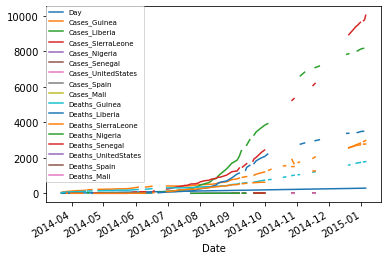

In [48]:
# 에볼라의 확산 속도
# ebola 데이터프레임의 Date 열을 인덱스로 지정하고 x축을 Date열, y축을 사망자 수로 지정하여 그린 그래프
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax=plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [49]:
# 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라 확산 속도를 비교 가능하다.
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [50]:
# Date 열의 자료형을 datetime 오브젝트로 변환하여 다시 데이터프레임 생성
# 중간에 날짜가 아예 없는 누락 데이터도 존재하므로 포함한다.
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=['Date'])
print(ebola.head().iloc[:, :5])
print('='*50)
print(ebola.tail().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [51]:
# Date 열을 인덱스로 지정, ebola 데이터프레임의 Date 열의 최대값과 최소값으로 시간 범위를 생성하여 new_idx에 저장한 것
# 날짜가 아예 없던 데이터의 인덱스를 생성할 수 있다.
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [52]:
# new_idx에 시간 순서와 반대로 생성 되어 있어서 reversed 메소드를 이용해 인덱스를 반대로 뒤집는다.
print(new_idx)
new_idx = reversed(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [53]:
# 다음은 reindex 메소드로 새로 생성한 new_idx를 새로운 인덱스로 지정한 것으로 없던 날짜들이 생겼다.
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:, :5])
print('='*50)
print(ebola.tail().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN
                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 

In [54]:
# 각 나라의 에볼라 발병일 옮기기
# last_valid_index는 가장 오래된 데이터를 불러오고, first_valid_index는 가장 최근의 데이터를 불러온다.
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

print('='*50)

first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]
Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia       

In [55]:
# 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면,
# 에볼라가 가장 처음 발병한 날(earliest_date)에서 각 나라의 에볼라 발병일(shift_values)만큼 옮기면 된다.

earliest_date = ebola.index.min()
print(earliest_date)

print('='*50)

shift_values = last_valid - earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [56]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [57]:
# ebola_dict에는 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장되어 있다.
ebola_shift = pd.DataFrame(ebola_dict)
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [58]:
# 인덱스를 Day열로 지정하고, 그래프에 필요없는 Date, Day 열은 삭제하면 그래프용 데이터프레임이 완성된다.
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

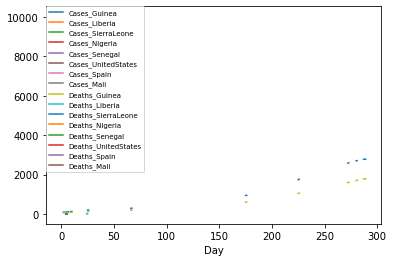

In [59]:
# x축이 Day로 변경되었다.
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()